<a href="https://colab.research.google.com/github/vinaysonare/Data-Science-Projects/blob/main/Take_home_user_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta


In [ ]:
#getting user df
userURL='https://drive.google.com/file/d/1dlBLbc8Dac56Gva2AZcZpChdXS7A6z9P/view?usp=sharing'
userfile_id=userURL.split('/')[-2]
userfile_url='https://drive.google.com/uc?id=' + userfile_id
user_df  = pd.read_csv(userfile_url,encoding='latin-1')
#getting engage df
engageURL='https://drive.google.com/file/d/1kOux52G4PbN2JS0JlyXOJHDEegzJc5_m/view?usp=sharing'
engageURL_id=engageURL.split('/')[-2]
engageURL_url='https://drive.google.com/uc?id=' + engageURL_id
engage_df = pd.read_csv(engageURL_url)

print(user_df.head())
print(engage_df.head())

   object_id        creation_time  ... org_id invited_by_user_id
0          1  2014-04-22 03:53:30  ...     11            10803.0
1          2  2013-11-15 03:45:04  ...      1              316.0
2          3  2013-03-19 23:14:52  ...     94             1525.0
3          4  2013-05-21 08:09:28  ...      1             5151.0
4          5  2013-01-17 10:14:20  ...    193             5240.0

[5 rows x 10 columns]
            time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1


Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period.
To get this info adding timestamp

In [ ]:
#set the time_stamp to datetime and the set it as the index
engage_df.time_stamp = pd.to_datetime(engage_df.time_stamp)
engage_df = engage_df.set_index('time_stamp', drop= True)
engage_df

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


In [ ]:
# creating a function to know wheter user is active or not in 7 day
def adoptedLabel(val):
    temp_df = engage_df.loc[engage_df['user_id'] == val] 
    temp_df = temp_df.resample('D').mean().dropna()
    adopted = 0
    #loop over active days till the second to last day
    for i in range(len(temp_df)-2):
        if temp_df.index[i + 2] - temp_df.index[i] <= timedelta(days=7):
            adopted = 1
            break
        else:
            adopted = 0
    return adopted
#creating column for adopted label
user_df['adopted_user'] = user_df['object_id'].apply(adoptedLabel)

In [ ]:
adoptedcount = user_df.loc[user_df['adopted_user'] == 1, 'adopted_user'].count()
adoptedpercent = adoptedcount/user_df.shape[0]*100
print('Adopted Users: ', adoptedcount)
print('% of total Users: ', adoptedpercent,'%')

Adopted Users:  1656
% of total Users:  13.8 %


Apparently there are **1656** adopted users which is **13.8%** of total users 

In [ ]:
#coverting last_session_creation_time to date time stamp
user_df['last_session_creation_time'] = user_df['last_session_creation_time'].map(lambda data: 
                                    datetime.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'),na_action='ignore')


In [ ]:
user_df.creation_time = pd.to_datetime(user_df.creation_time)

user_df['last_session_creation_time'] = pd.to_datetime(user_df['last_session_creation_time'])
#Finding time length of being active
user_df['usage_length'] = user_df['last_session_creation_time'] - user_df['creation_time']
user_df['usage_length'] = [x.total_seconds() for x in user_df['usage_length']]
#Replacing NaN with 0s
user_df.invited_by_user_id = user_df.invited_by_user_id.fillna(0)
user_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_length
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,11750400.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,86400.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,432000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,0,432000.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,0,172800.0


In [ ]:
# Creating a feature dataframe which is not useful
feature_df = user_df.iloc[:,5:]
feature_df = feature_df.drop('last_session_creation_time', axis=1)
#Replacing NaN with 0s#Replacing NaN with 0s
feature_df['usage_length'] = feature_df['usage_length'].fillna(0)
feature_df

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_length
0,1,0,11,10803.0,0,0.0
1,0,0,1,316.0,1,11750400.0
2,0,0,94,1525.0,0,0.0
3,0,0,1,5151.0,0,86400.0
4,0,0,193,5240.0,0,432000.0
...,...,...,...,...,...,...
11995,0,0,89,8263.0,0,0.0
11996,0,0,200,0.0,0,432000.0
11997,1,1,83,8074.0,0,0.0
11998,0,0,6,0.0,0,172800.0


In [ ]:
from sklearn.model_selection import train_test_split

x = feature_df.drop('adopted_user', axis=1)
y = feature_df.adopted_user
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=10)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((7200, 5), (7200,), (4800, 5), (4800,))

In [ ]:
#train and test classifier using radom forest classifier as it can tell importance of a feature
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced_subsample')
rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

0.9689583333333334

Here mean accuray is almost **97%** which is very good

In [ ]:
#predictin from test data
y_predicted =  knn.predict(xtest)
#To check prediction report and find advisable K value
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,y_predicted))
cm= confusion_matrix(ytest,y_predicted)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4154
           1       0.90      0.87      0.89       646

    accuracy                           0.97      4800
   macro avg       0.94      0.93      0.93      4800
weighted avg       0.97      0.97      0.97      4800

confusion matrix:
[[4090   64]
 [  82  564]]


In [ ]:
# Hence factors which predict future user adoption
print('Factors which predict future user adoption are: ',*x.columns)

Factors which predict future user adoption are:  opted_in_to_mailing_list enabled_for_marketing_drip org_id invited_by_user_id usage_length


We can also look into a graph showing importance of the features

In [ ]:
#make a df that displays the cofficients indexed by feature name
feat_importance = pd.DataFrame()
feat_importance['feature']  = x.columns
feat_importance['coef'] = rfc.feature_importances_
# feat_importance.coef.nlargest(10)
feat_importance = feat_importance.sort_values(by='coef', ascending=False)
feat_importance

,feature,coef
4,usage_length,0.914691
2,org_id,0.050845
3,invited_by_user_id,0.028571
0,opted_in_to_mailing_list,0.003290
1,enabled_for_marketing_drip,0.002604


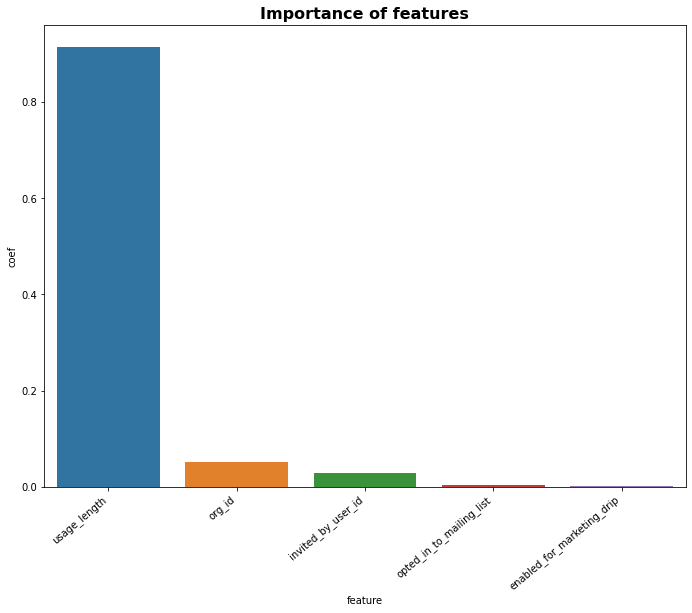

In [ ]:
#plot the results
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(11.5, 8.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.barplot(x='feature',y = 'coef',data = feat_importance)
ax.set_title("Importance of features", size=16,fontweight="bold")
plt.show()



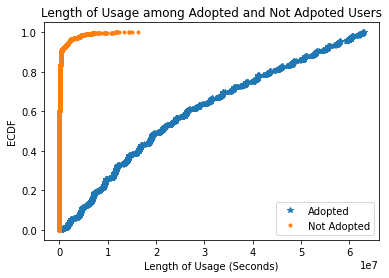

In [ ]:
# Finding ecdf of dataset
adopted = feature_df.usage_length.loc[feature_df['adopted_user'] == 1]
not_adopted = feature_df.usage_length.loc[feature_df['adopted_user'] == 0]

#set fig size
x_active = np.sort(adopted)
y_active = np.arange(1, len(adopted)+1) / len(adopted)
x_inactive = np.sort(not_adopted)
y_inactive = np.arange(1, len(not_adopted)+1) / len(not_adopted)

plt.plot(x_active, y_active, marker='*', linestyle='none')
plt.plot(x_inactive, y_inactive, marker='.', linestyle='none')
plt.title('Length of Usage among Adopted and Not Adpoted Users')
plt.xlabel('Length of Usage (Seconds)')
plt.ylabel('ECDF')
plt.legend(['Adopted', 'Not Adopted'])
plt.show()
